In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.io import readsav
import IMA2
N=5
M=10

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Q1: Le filtre $H_\alpha$  est un filtre centré en une longueur d'onde, celle de la raie alpha de l'hydrogène soit $\lambda = 656,3$nm, et très fin. Il nécessite donc un temps de pose plus long (car sa bande passante est plus réduite)

Q2: Il permet d'observer la désexcitation d'un atome d'hydrogène du niveau n=2 à n=1

Q3: Le traitement se compose des étapes suivantes:
* Moyennage/medianage du flat et de son dark, ainsi que du dark de l'image
* Réduction de l'image par : (Image - DarkI)/[(Flat-DarkF)/moyenne(Flat-DarkF)] 

Moyenne flat: 3640.888916015625    Median flat:4326.0  sdt flat:620.6985473632812
Moyenne dark: 740.8745727539062    Median dark:702.0 std dark:116.23784637451172
Moyenne image: 878.2537231445312    Median image:788.0 std image:547.4547729492188


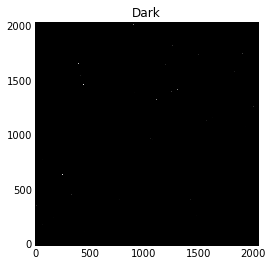

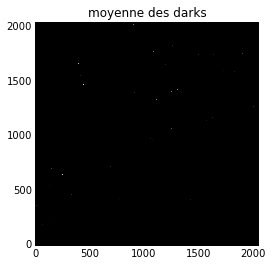

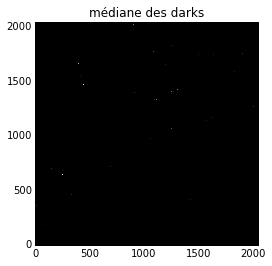

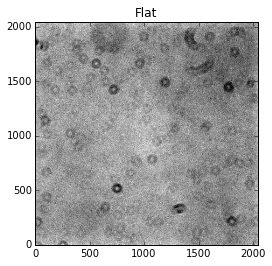

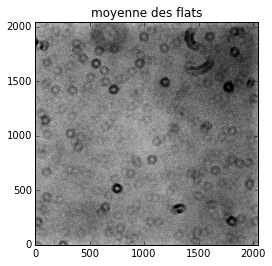

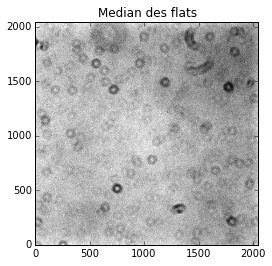

In [2]:
darkn_i=[]
for x in range(1,N+1):
    dark=fits.getdata('dark60_'+str(x)+'.fits')
    darkn_i.append(dark)

cube=np.array(darkn_i)
dark_im=np.mean(cube, axis=0)
dark_imed=np.median(cube, axis=0)
dark_istd=np.std(cube,axis=0)


darkn_f=[]
for x in range(1,N+1):
    dark=fits.getdata('dark10_'+str(x)+'.fits')
    darkn_f.append(dark)

cube=np.array(darkn_f)
darkf_im=np.mean(cube, axis=0)
darkf_imed=np.median(cube, axis=0)
darkf_istd=np.std(cube,axis=0)

plt.imshow(darkn_i[0], cmap='gray', origin='lower',vmin=1800, vmax=2200)
plt.title('Dark')
plt.figure()
plt.imshow(dark_im, cmap='gray', origin='lower',vmin=1800, vmax=2200)
plt.title('moyenne des darks')
plt.figure()
plt.imshow(dark_imed, cmap='gray', origin='lower',vmin=1800, vmax=2200)
plt.title('médiane des darks')
    
flatn=[]
for x in range(1,M):
    flat=fits.getdata('flathalpha_'+str(x)+'.fits')
    flatn.append(flat/10)

    
cube=np.array(flatn)
flat_m=np.mean(cube, axis=0)
flat_med=np.median(cube, axis=0)
flat_std=np.std(cube,axis=0)

imgn=[]
for x in range(5,M):
    imag=fits.getdata('halpha_'+str(x)+'.fits')
    imgn.append(imag)
    

cube=np.array(imgn)
img_m=np.mean(cube, axis=0)
img_med=np.median(cube, axis=0)
img_std=np.std(cube,axis=0)

print("Moyenne flat: {0:}    Median flat:{1}  sdt flat:{2}".format(np.mean(flatn), np.median(flatn), np.std(flatn)))
print("Moyenne dark: {0}    Median dark:{1} std dark:{2}".format(np.mean(darkn_i), np.median(darkn_i), np.std(darkn_i)))
print("Moyenne image: {0}    Median image:{1} std image:{2}".format(np.mean(imgn), np.median(imgn), np.std(imgn)))
plt.figure()
#histogram=plt.hist(flatn[0].flatten(),bins=1000, histtype='bar', normed=True, range=(3000,3400))
plt.imshow(flatn[0], cmap='gray', origin='lower',vmin=3000, vmax=3400)
plt.title('Flat')
plt.figure()
plt.imshow(flat_m, cmap='gray', origin='lower',vmin=4000, vmax=4500)
plt.title('moyenne des flats')
#histogram=plt.hist(flat_m.flatten(),bins=1000, histtype='bar', normed=True)
plt.figure()
plt.imshow(flat_med, cmap='gray', origin='lower',vmin=4000, vmax=4500)
plt.title('Median des flats')
#histogram=plt.hist(flat_med.flatten(),bins=1000, histtype='bar', normed=True)


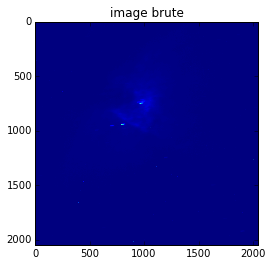

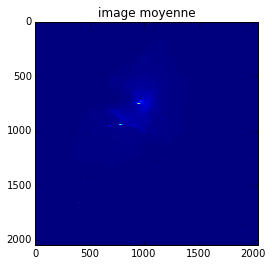

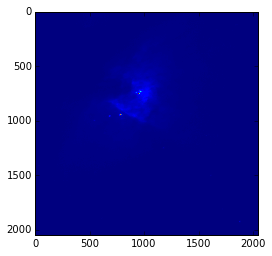

In [3]:
image_red=(img_med-dark_imed)/(flat_med-darkf_imed)
plt.figure()
plt.imshow(imgn[0], cmap='jet')
#histogram=plt.hist(imgn[0].flatten(),bins=1000, histtype='bar', normed=True, range=(500,3000))

plt.title('image brute')
plt.figure()
plt.imshow(img_m, cmap='jet')
#histogram=plt.hist(img_m.flatten(),bins=1000, histtype='bar', normed=True, range=(500,3000))

plt.title('image moyenne')
plt.figure()
plt.imshow(image_red, cmap='jet', vmin=0, vmax=10)
#histogram=plt.hist(((img_med-dark_imed)/(flat_m)).flatten(),bins=1000, histtype='bar', normed=True, range=(0,2))

plt.show()

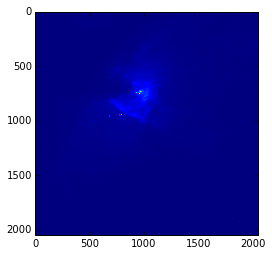

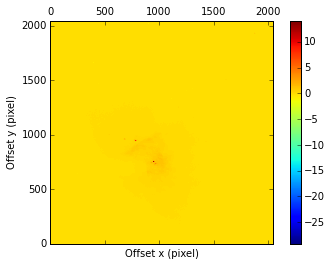

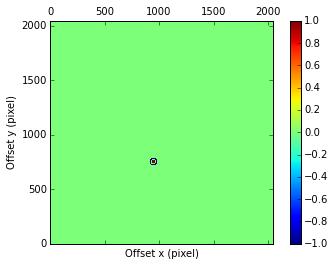

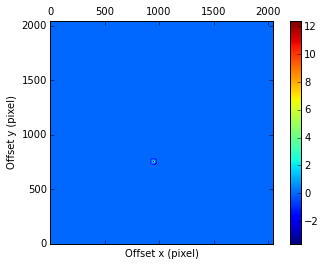

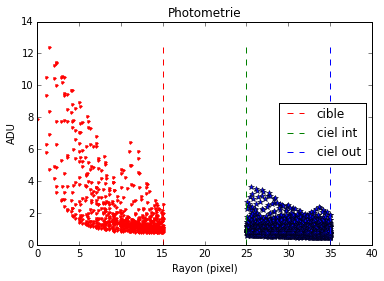

Aires analysées : centre :  709  pixels ; couronne :  1892  pixels
Intensité mesurée :  946.081950859  ADU
Intensité de la cible :  2.33831778501  ADU/pixel ; Intensité du fond :  1.00392857364  ADU/pixel


[946.08195085908596, 946.08195085908596, -7.4398218929716666]

In [4]:
plt.imshow(image_red, cmap='jet', vmin=0, vmax=7)
plt.show()
IMA2.photometrie(image_red,[945,753],15,25,35)

4: RSB = $$\frac{946}{\sqrt{946+116^2 + 1892^2}}=0.49$$
Apparemment il y a un problème avec mes images, le RSB est très faible malgré tout les traitements effectués et après avoir passé une heure à tenter de pointer correctement une étoile avec la fonction photométrie, j'abandonne...

Q5: On a en plus des composantes rouges, car le filtre n'est pas selectif sur une seule longueur d'onde et possède une largeur de bande non nulle. Or 656 se trouve dans les bandes rouges du spectre.

Q12: Le spectromètre utilisé est composé dans notre cas d'une lentille, fente et d'un réseau blazé. Pour faire varier l'angle d'inclinaison du réseau, on dispose d'un vernier qui produit une pression sur le réseau changeant son inclinaison et donc l'ordre d'interférence.

Q13: La fente est positionné dans le plan image du télescope, elle sert de diaphragmme.

Q14: Les courtes longueurs d'ondes sont les plus proches de l'ordre 0 du réseau blazé.

Q15: Pour régler l'inclinaison du réseau et donc l'ordre 


